In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
downloaded = drive.CreateFile({'id':'1K31JhhVaufiemrSERg6Lpbz3RB44D9Aq'}) 
downloaded.GetContentFile('WIPRO.NS.csv') 

In [ ]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('WIPRO.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21,362.500000,367.450012,348.350006,353.950012,353.156036,9665063
1,2020-12-22,354.000000,365.700012,349.450012,364.200012,363.383057,8186039
2,2020-12-23,374.000000,387.600006,371.700012,385.549988,384.685150,44874433
3,2020-12-24,386.450012,386.700012,378.649994,382.200012,381.342682,12240172
4,2020-12-28,383.450012,386.399994,382.000000,382.899994,382.041077,4725879
...,...,...,...,...,...,...,...
241,2021-12-13,643.500000,656.549988,640.200012,645.400024,645.400024,6561840
242,2021-12-14,646.000000,651.900024,639.250000,646.900024,646.900024,4304706
243,2021-12-15,646.700012,646.700012,635.349976,636.400024,636.400024,3561772
244,2021-12-16,644.000000,649.900024,639.400024,644.299988,644.299988,6218620


In [ ]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-21,362.500000,367.450012,348.350006,353.950012,353.156036,9665063
2020-12-22,354.000000,365.700012,349.450012,364.200012,363.383057,8186039
2020-12-23,374.000000,387.600006,371.700012,385.549988,384.685150,44874433
2020-12-24,386.450012,386.700012,378.649994,382.200012,381.342682,12240172
2020-12-28,383.450012,386.399994,382.000000,382.899994,382.041077,4725879
...,...,...,...,...,...,...
2021-12-13,643.500000,656.549988,640.200012,645.400024,645.400024,6561840
2021-12-14,646.000000,651.900024,639.250000,646.900024,646.900024,4304706
2021-12-15,646.700012,646.700012,635.349976,636.400024,636.400024,3561772


In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2020-12-21,8.549988,19.100006
2020-12-22,-10.200012,16.250000
2020-12-23,-11.549988,15.899994
2020-12-24,4.250000,8.050018
2020-12-28,0.550018,4.399994


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)


In [ ]:
df['Predicted_Signal'] = cls.predict(X)

In [ ]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [ ]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2020-12-21,362.500000,367.450012,348.350006,353.950012,353.156036,9665063,8.549988,19.100006,0,NaN,NaN,NaN
2020-12-22,354.000000,365.700012,349.450012,364.200012,363.383057,8186039,-10.200012,16.250000,1,0.028959,0.000000,0.028959
2020-12-23,374.000000,387.600006,371.700012,385.549988,384.685150,44874433,-11.549988,15.899994,1,0.058622,0.058622,0.087580
2020-12-24,386.450012,386.700012,378.649994,382.200012,381.342682,12240172,4.250000,8.050018,1,-0.008689,-0.008689,0.078892
2020-12-28,383.450012,386.399994,382.000000,382.899994,382.041077,4725879,0.550018,4.399994,1,0.001831,0.001831,0.080723
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,643.500000,656.549988,640.200012,645.400024,645.400024,6561840,-1.900024,16.349976,1,0.011203,0.011203,0.639389
2021-12-14,646.000000,651.900024,639.250000,646.900024,646.900024,4304706,-0.900024,12.650024,1,0.002324,0.002324,0.641713
2021-12-15,646.700012,646.700012,635.349976,636.400024,636.400024,3561772,10.299988,11.350036,1,-0.016231,-0.016231,0.625482


In [ ]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2020-12-21,362.500000,367.450012,348.350006,353.950012,353.156036,9665063,8.549988,19.100006,0,NaN,NaN,NaN,NaN
2020-12-22,354.000000,365.700012,349.450012,364.200012,363.383057,8186039,-10.200012,16.250000,1,0.028959,0.000000,0.028959,0.000000
2020-12-23,374.000000,387.600006,371.700012,385.549988,384.685150,44874433,-11.549988,15.899994,1,0.058622,0.058622,0.087580,0.058622
2020-12-24,386.450012,386.700012,378.649994,382.200012,381.342682,12240172,4.250000,8.050018,1,-0.008689,-0.008689,0.078892,0.049933
2020-12-28,383.450012,386.399994,382.000000,382.899994,382.041077,4725879,0.550018,4.399994,1,0.001831,0.001831,0.080723,0.051764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,643.500000,656.549988,640.200012,645.400024,645.400024,6561840,-1.900024,16.349976,1,0.011203,0.011203,0.639389,0.822301
2021-12-14,646.000000,651.900024,639.250000,646.900024,646.900024,4304706,-0.900024,12.650024,1,0.002324,0.002324,0.641713,0.824625
2021-12-15,646.700012,646.700012,635.349976,636.400024,636.400024,3561772,10.299988,11.350036,1,-0.016231,-0.016231,0.625482,0.808394


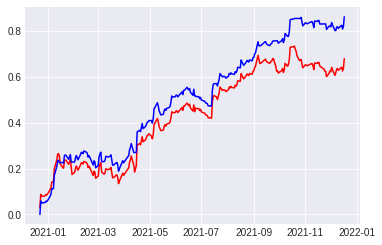

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')